# Example T K D E
Example of using the TKDE class (kernel density estimator)




**Author:**  Lorenzo Moneta, Bartolomeu Rabacal (Dec 2010)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:06 AM.</small></i>

In [1]:
%%cpp -d
#include "TH1.h"
#include "TF1.h"
#include "TKDE.h"
#include "TCanvas.h"
/*#include "TStopwatch.h"*/
#include "TRandom.h"
#include "Math/DistFunc.h"
#include "TLegend.h"

Test tkde

 Arguments are defined. 

In [2]:
int n = 1000;

Generate some gaussian points

In [3]:
int nbin = 100;
double xmin = 0;
double xmax = 10;

TH1D * h1 = new TH1D("h1","h1",nbin,xmin,xmax);

Generate some points with bi- gaussian distribution

In [4]:
std::vector<double> data(n);
for (int i = 0; i < n; ++i) {
   if (i < 0.4*n) {
      data[i] = gRandom->Gaus(2,1);
      h1->Fill(data[i]);
   }
   else {
      data[i] = gRandom->Gaus(7,1.5);
      h1->Fill(data[i]);
   }
}

Scale histogram

In [5]:
h1->Scale(1./h1->Integral(),"width" );
h1->SetStats(false);
h1->SetTitle("Bi-Gaussian");
h1->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Drawn true normalized density

In [6]:
TF1 * f1 = new TF1("f1","0.4*ROOT::Math::normal_pdf(x,1,2)+0.6*ROOT::Math::normal_pdf(x,1.5,7)",xmin,xmax);
f1->SetLineColor(kGreen+2);
f1->Draw("SAME");

Create tkde class

In [7]:
double rho = 1.0; //default value
TKDE * kde = new TKDE(n, &data[0], xmin,xmax, "", rho);

Kde->draw("confidenceinterval@0.95 same");

In [8]:
kde->Draw("SAME");

TLegend * legend = new TLegend(0.6,0.7,0.9,0.95);
legend->AddEntry(f1,"True function");
legend->AddEntry(kde->GetDrawnFunction(),"TKDE");
legend->AddEntry(kde->GetDrawnLowerFunction(),"TKDE - #sigma");
legend->AddEntry(kde->GetDrawnUpperFunction(),"TKDE + #sigma");
legend->Draw();

Draw all canvases 

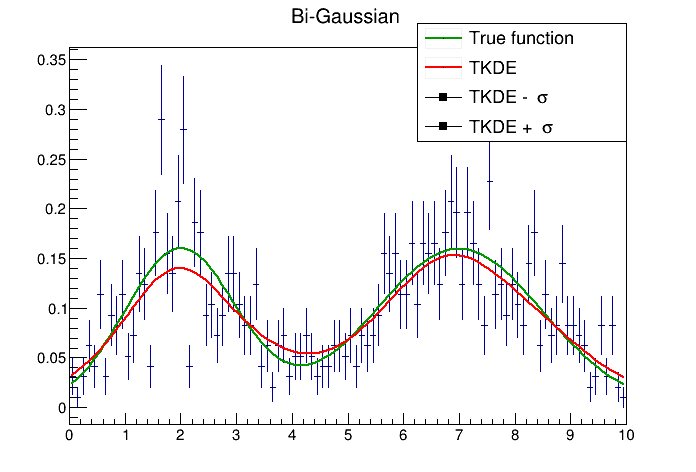

In [9]:
gROOT->GetListOfCanvases()->Draw()